# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/challenge-two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create training dataset
train_points = 20
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [3]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)  #

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)

# Print the coefficients
print("Coefficients:", ridge_model.coef_)

Mean Squared Error: 720.1565941091941
Coefficients: [[-5.04225985]]


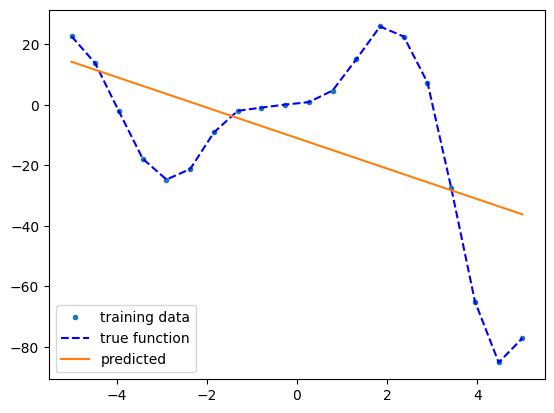

In [4]:
plt.plot(X_train[:,0], y_train, 'o', markersize=3, label="training data")
plt.plot(X_train[:,0], y_train, c = 'b', linestyle="--", label="true function")
plt.plot(X_test[:,0], y_pred_ridge, label = 'predicted')
plt.legend()

In [5]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

# Define the range of parameters to search over
param_grid_gau = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter
    'gamma': np.linspace(0.1, 1.0, 10)  # Kernel coefficient
}


# Create and train the Kernel Ridge Regression model
# Here we use the radial basis function (RBF) kernel
krr_gau = KernelRidge(kernel='rbf') 

# Perform grid search with cross-validation
grid_search_gau = GridSearchCV(krr_gau, param_grid_gau, cv=5, scoring='neg_mean_squared_error')
grid_search_gau.fit(X_train, y_train)

# Get the best estimator
best_krr_gau = grid_search_gau.best_estimator_

krr_gau.fit(X_train, y_train)

# Make predictions
y_pred_gau = best_krr_gau.predict(X_test)

# Evaluate the model
mse_gau = mean_squared_error(y_test, y_pred_gau)
print("Mean Squared Error:", mse_gau)
print("Best parameters:", grid_search_gau.best_params_)

Mean Squared Error: 2.6916753476541646
Best parameters: {'alpha': 0.1, 'gamma': 0.4}


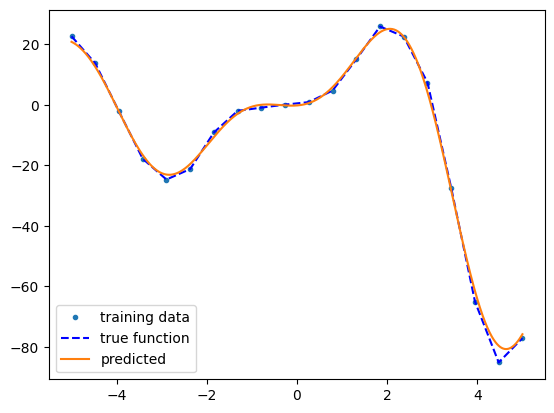

In [6]:
plt.plot(X_train[:,0], y_train, 'o', markersize=3, label="training data")
plt.plot(X_train[:,0], y_train, c = 'b', linestyle="--", label="true function")
plt.plot(X_test[:,0], y_pred_gau, label = 'predicted')
plt.legend()

In [7]:
param_grid_pol = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization parameter
    'degree': [2, 3, 4],  # Degree of polynomial kernel
    'gamma': np.linspace(0.1, 1.0, 10)  # Kernel coefficient
}

# Create and train the Kernel Ridge Regression model
# Here we use the polynomial kernel
krr_pol = KernelRidge(kernel='polynomial') 

# Perform grid search with cross-validation
grid_search_pol = GridSearchCV(krr_pol, param_grid_pol, cv=5, scoring='neg_mean_squared_error')
grid_search_pol.fit(X_train, y_train)

# Get the best estimator
best_krr_pol = grid_search_pol.best_estimator_

krr_pol.fit(X_train, y_train)

# Make predictions
y_pred_pol = best_krr_pol.predict(X_test)

# Evaluate the model
mse_pol = mean_squared_error(y_test, y_pred_pol)
print("Mean Squared Error:", mse_pol)
print("Best parameters:", grid_search_pol.best_params_)


Mean Squared Error: 100.73555761387001
Best parameters: {'alpha': 1.0, 'degree': 3, 'gamma': 1.0}


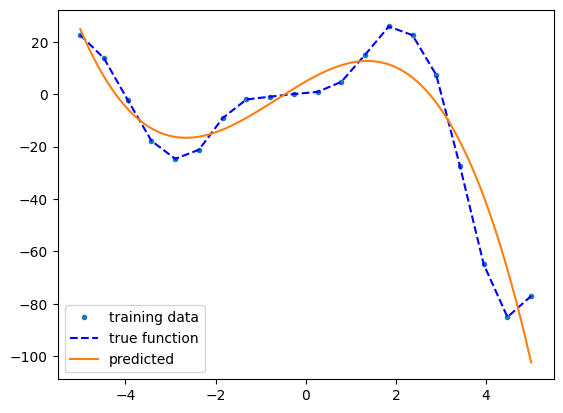

In [8]:
plt.plot(X_train[:,0], y_train, 'o', markersize=3, label="training data")
plt.plot(X_train[:,0], y_train, c = 'b', linestyle="--", label="true function")
plt.plot(X_test[:,0], y_pred_pol, label = 'predicted')
plt.legend()

In [9]:
# Choose the best model based on MSE
if mse_gau < mse_pol:
    best_model = best_krr_gau
    best_kernel = 'Gaussian'
else:
    best_model = best_krr_pol
    best_kernel = 'Polynomial'

print("Best kernel:", best_kernel)

Best kernel: Gaussian


## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [10]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

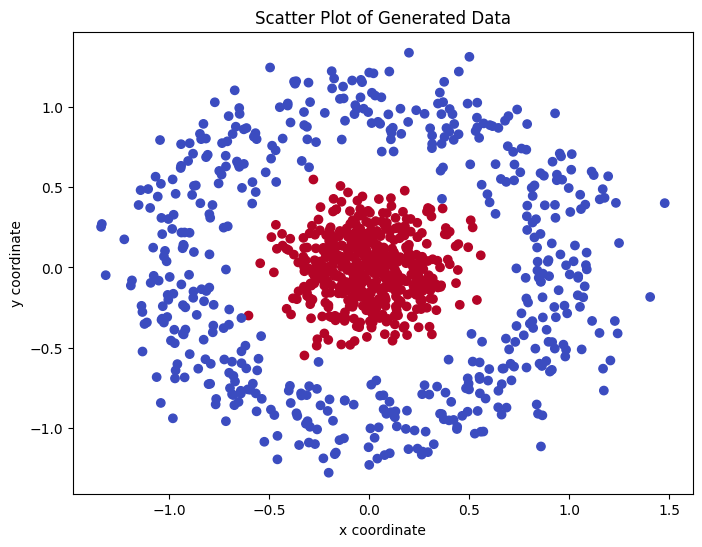

In [11]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()

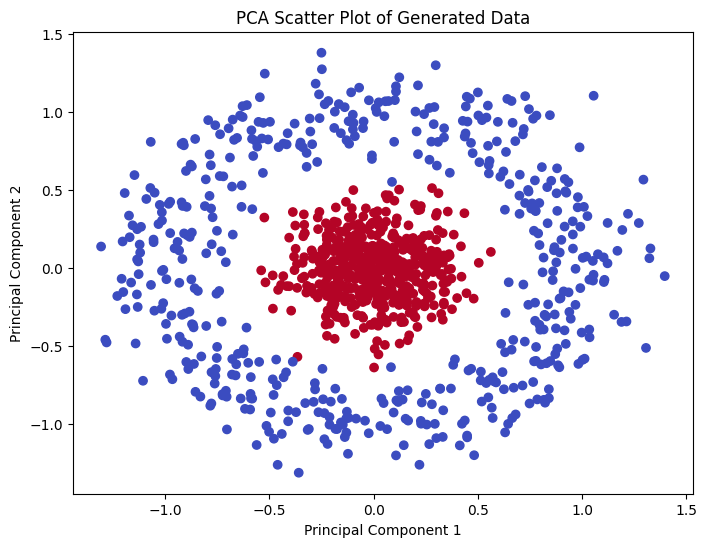

In [12]:
from sklearn.decomposition import PCA

# Fit PCA model
pca = PCA(n_components=2)  
X_pca_2 = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('PCA Scatter Plot of Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


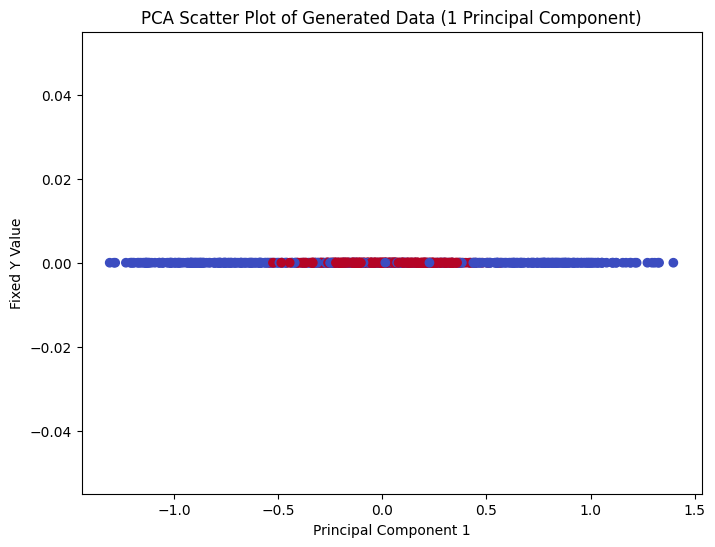

In [13]:
# Fit PCA model
pca = PCA(n_components=1)  
X_pca_1 = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_1[:, 0], [0] * len(X_pca_1), c=y, cmap=plt.cm.coolwarm)  # Y values set to 0 for visualization
plt.title('PCA Scatter Plot of Generated Data (1 Principal Component)')
plt.xlabel('Principal Component 1')
plt.ylabel('Fixed Y Value')
plt.show()


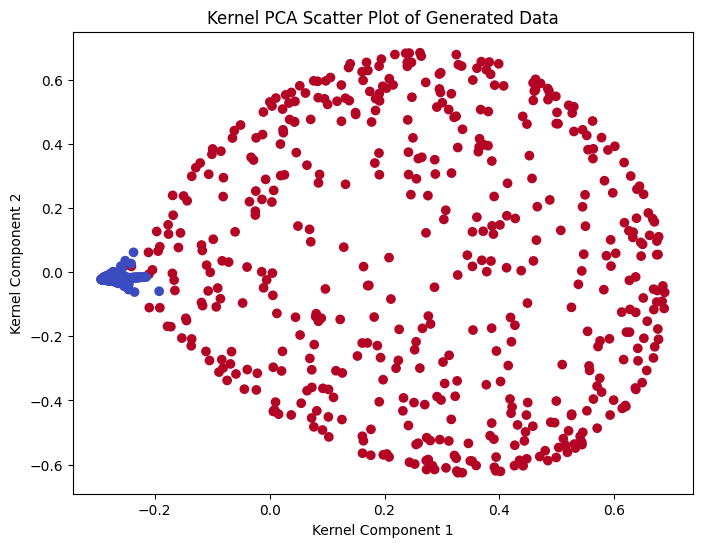

In [14]:
from sklearn.decomposition import KernelPCA

# Fit Kernel PCA model
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)  # Radial Basis Function (RBF) kernel
X_kpca = kpca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Kernel PCA Scatter Plot of Generated Data')
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.show()

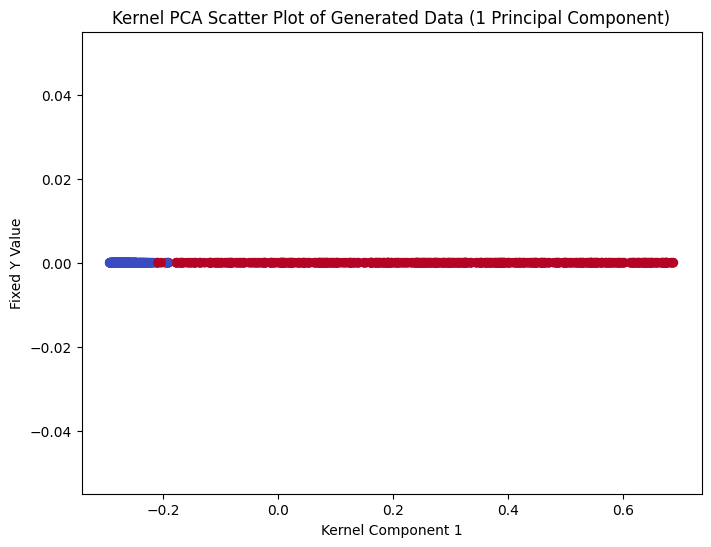

In [15]:
# Fit Kernel PCA model with 1 principal component
kpca_1 = KernelPCA(kernel='rbf', gamma=15, n_components=1)  # Using Radial Basis Function (RBF) kernel
X_kpca_1 = kpca_1.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_1, [0] * len(X_kpca_1), c=y, cmap=plt.cm.coolwarm)  # Y values set to 0 for visualization
plt.title('Kernel PCA Scatter Plot of Generated Data (1 Principal Component)')
plt.xlabel('Kernel Component 1')
plt.ylabel('Fixed Y Value')
plt.show()

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Transform the training and test data using Kernel PCA
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

svm = SVC(kernel='rbf', gamma=15)
svm.fit(X_train_kpca, y_train)
# Predict labels for the test data
y_pred_test = svm.predict(X_test_kpca)
# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy of SVM classifier with Kernel PCA on test data:", accuracy)

Accuracy of SVM classifier with Kernel PCA on test data: 0.984


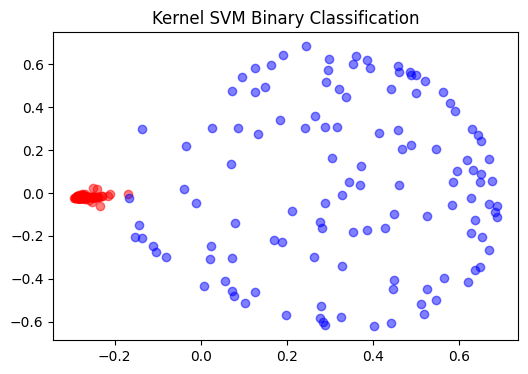

In [29]:
plt.figure(figsize=(6,4))

plt.scatter(X_test_kpca[y_pred_test==0, 0], X_test_kpca[y_pred_test==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca[y_pred_test==1, 0], X_test_kpca[y_pred_test==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification')

plt.show()

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

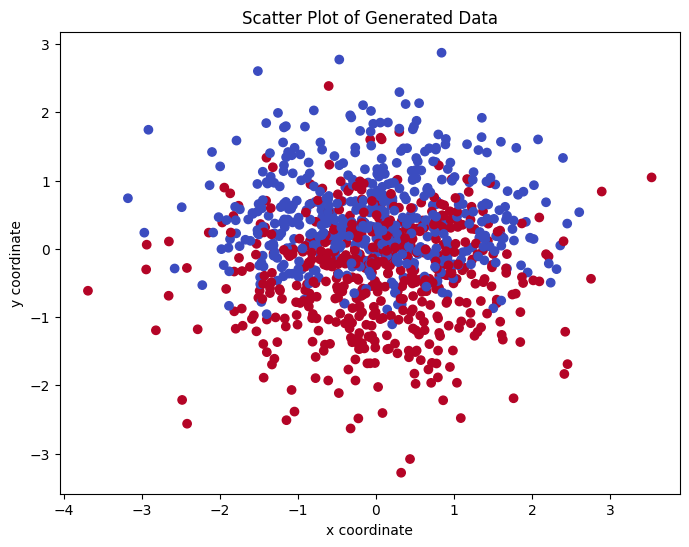

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score


# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()


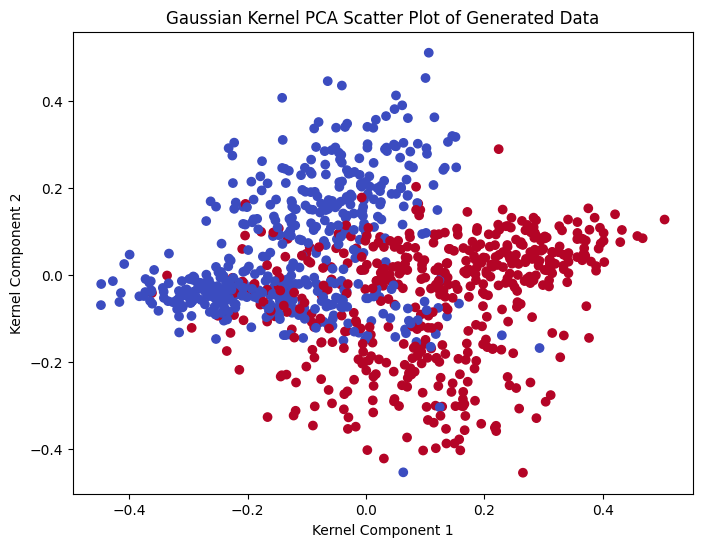

In [19]:
# Fit Kernel PCA model
kpca_gau = KernelPCA(kernel='rbf', n_components=2)  # Radial Basis Function (RBF) kernel
X_kpca_gau = kpca_gau.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_gau[:, 0], X_kpca_gau[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Gaussian Kernel PCA Scatter Plot of Generated Data')
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.show()

In [20]:
# Transform the training and test data using Kernel PCA
X_train_kpca_gau = kpca_gau.transform(X_train)
X_test_kpca_gau = kpca_gau.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train_kpca_gau, y_train)
# Predict labels for the test data
y_pred_test_gau = svm.predict(X_test_kpca_gau)
# Calculate accuracy on the test data
accuracy_gau = accuracy_score(y_test, y_pred_test_gau)
print("Accuracy of SVM classifier with Kernel PCA on test data:", accuracy_gau)

Accuracy of SVM classifier with Kernel PCA on test data: 0.876


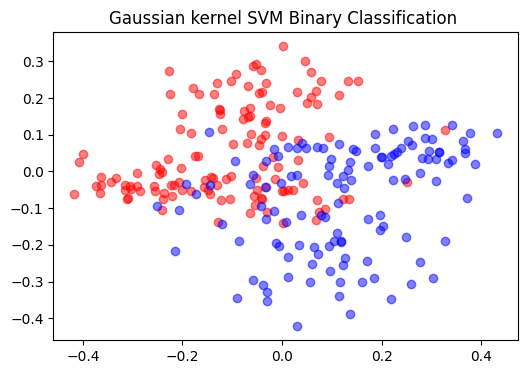

In [21]:
plt.figure(figsize=(6,4))

plt.scatter(X_test_kpca_gau[y_pred_test==0, 0], X_test_kpca_gau[y_pred_test==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_gau[y_pred_test==1, 0], X_test_kpca_gau[y_pred_test==1, 1], color='blue', alpha=0.5)

plt.title('Gaussian kernel SVM Binary Classification ')

plt.show()

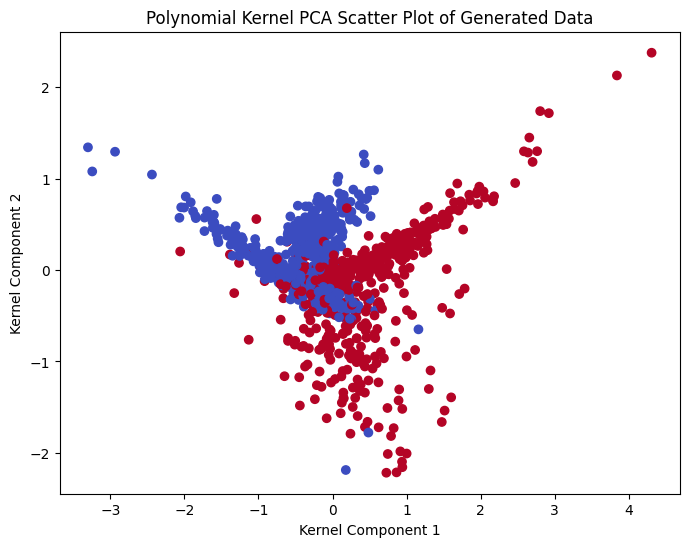

In [22]:
# Fit Kernel PCA model
kpca_poly = KernelPCA(kernel='poly', n_components=2)  # polynomial kernel
X_kpca_poly = kpca_poly.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Polynomial Kernel PCA Scatter Plot of Generated Data')
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.show()

In [23]:
# Transform the training and test data using Kernel PCA
X_train_kpca_poly = kpca_poly.transform(X_train)
X_test_kpca_poly = kpca_poly.transform(X_test)

svm = SVC(kernel='poly')
svm.fit(X_train_kpca_poly, y_train)
# Predict labels for the test data
y_pred_test_poly = svm.predict(X_test_kpca_poly)
# Calculate accuracy on the test data
accuracy_poly = accuracy_score(y_test, y_pred_test_poly)
print("Accuracy of SVM classifier with Kernel PCA on test data:", accuracy_poly)

Accuracy of SVM classifier with Kernel PCA on test data: 0.808


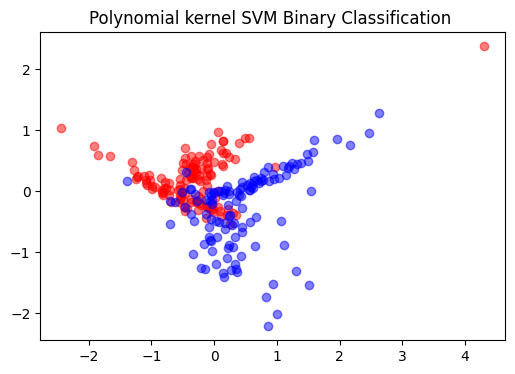

In [24]:
plt.figure(figsize=(6,4))

plt.scatter(X_test_kpca_poly[y_pred_test==0, 0], X_test_kpca_poly[y_pred_test==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_poly[y_pred_test==1, 0], X_test_kpca_poly[y_pred_test==1, 1], color='blue', alpha=0.5)

plt.title('Polynomial kernel SVM Binary Classification ')

plt.show()

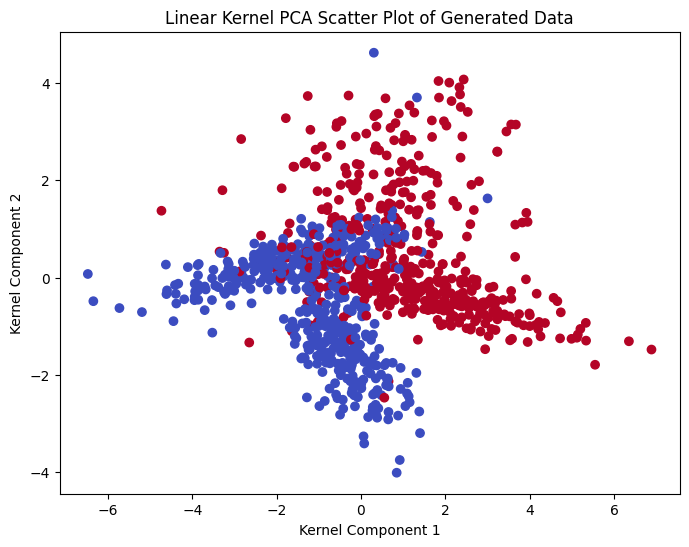

In [25]:
# Fit Kernel PCA model
kpca_lin = KernelPCA(kernel='linear', n_components=2)  # linear kernel
X_kpca_lin = kpca_lin.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_lin[:, 0], X_kpca_lin[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.title('Linear Kernel PCA Scatter Plot of Generated Data')
plt.xlabel('Kernel Component 1')
plt.ylabel('Kernel Component 2')
plt.show()

In [26]:
# Transform the training and test data using Kernel PCA
X_train_kpca_lin = kpca_lin.transform(X_train)
X_test_kpca_lin = kpca_lin.transform(X_test)

svm = SVC(kernel='poly')
svm.fit(X_train_kpca_lin, y_train)
# Predict labels for the test data
y_pred_test_lin = svm.predict(X_test_kpca_lin)
# Calculate accuracy on the test data
accuracy_lin = accuracy_score(y_test, y_pred_test_lin)
print("Accuracy of SVM classifier with Kernel PCA on test data:", accuracy_lin)

Accuracy of SVM classifier with Kernel PCA on test data: 0.864


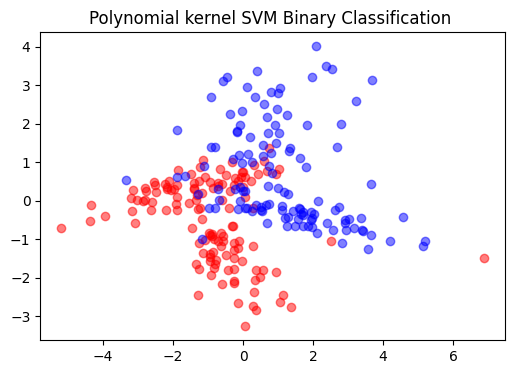

In [27]:
plt.figure(figsize=(6,4))

plt.scatter(X_test_kpca_lin[y_pred_test==0, 0], X_test_kpca_lin[y_pred_test==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_lin[y_pred_test==1, 0], X_test_kpca_lin[y_pred_test==1, 1], color='blue', alpha=0.5)

plt.title('Polynomial kernel SVM Binary Classification ')

plt.show()

In [28]:
# Iterate over different kernels
kernels = ['linear', 'poly', 'rbf']
best_kernel = None
best_accuracy = 0

for kernel in kernels:
    # Perform Kernel PCA
    kpca = KernelPCA(kernel=kernel, n_components=2)
    X_kpca = kpca.fit_transform(X)
    
    # Train SVM classifier using cross-validation
    svm_classifier = SVC(kernel=kernel)  
    accuracy = cross_val_score(svm_classifier, X_kpca, y, cv=5, scoring='accuracy').mean()
    
    # Update best kernel if accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print("Best kernel for PCA:", best_kernel)
print("Accuracy with best kernel:", best_accuracy)


Best kernel for PCA: linear
Accuracy with best kernel: 0.866
